<a href="https://colab.research.google.com/github/Sameenzehra/CNN-models/blob/main/Image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import keras
import tensorflow as tf


In [ ]:
import tensorflow as tf
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 10253077999139512432
xla_global_id: -1
]


In [ ]:
from keras.datasets import mnist
(x_train,y_train),(x_test,y_test)= mnist.load_data()

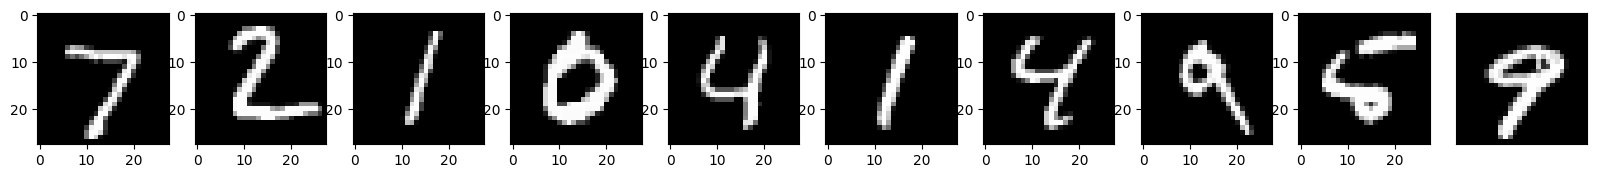

In [ ]:
import matplotlib.pyplot as plt

#number of digits to display
n=10
# create figure to show images
plt.figure(figsize=(20,4))

# loop through the data
for i in range(n):
   ax = plt.subplot(2,n,i+1)

   # show image within the figure
   plt.imshow(x_test[i].reshape(28,28))
   # set the color scale gray
   plt.gray()

   # Hide x-axis and y-axis labels and ticks
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

# Show the figure with the images
plt.show()

# Close the figure
plt.close()


In [ ]:
print('The shape of x_train',x_train.shape)
print('The shape of y_train',y_train.shape)
print('The shape of x_test',x_test.shape)
print('The shape of y_test',y_test.shape)

The shape of x_train (60000, 28, 28)
The shape of y_train (60000,)
The shape of x_test (10000, 28, 28)
The shape of y_test (10000,)


In [ ]:
# Reshape data, chennels represents the color of the image if grayscale, means channel 1

x_train = x_train.reshape(x_train.shape[0],28,28,1)
x_test = x_test.reshape(x_test.shape[0],28,28,1)

In [ ]:
# min max scaling
# converting to floating points and normalizing pixel values in range [0,1]
x_train = x_train.astype("float32")
x_test = x_test.astype("float32")
x_train /= 255
x_test /= 255

**one-hot encoding**

In [ ]:
# reshaping labels in multiclass classification
from keras.utils import to_categorical

y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

print('x_train shape', x_train.shape)
print('y_train shape', y_train.shape)
print('x_test shape', x_test.shape)
print('y_test shape', y_test.shape)


x_train shape (60000, 28, 28, 1)
y_train shape (60000, 10)
x_test shape (10000, 28, 28, 1)
y_test shape (10000, 10)


In [ ]:
print(keras.__version__)

2.15.0


In [ ]:
from keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten,Conv2D,MaxPooling2D



In [ ]:
from warnings import filters
# define the dimensions of the input image
img_rows, img_cols, channels = 28,28,1


#Define the number of filter on each convolutional layer
filters = [6,32,80,120]

#Define the number of classes for classification
classes = 10

In [ ]:
# Creating model

model = Sequential() # Sequential is a container for layers
model.add(Conv2D(filters[0],(3,3), padding='same',
      activation='relu', input_shape=(img_rows,img_cols,channels)))
# add pooling layer
model.add(MaxPooling2D(pool_size=(2,2)))
#To reduce image size (dim + pad - kernel)/2 = 28+3-3/2=14
model.add(Conv2D(filters[1],(2,2),padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
# (dim+pad-kernel)/2   (14 +2 -2)/2 = 7
model.add(Conv2D(filters[2],(2,2),padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
# (dim+pad-kernel)/2   (7 +2 -2)/2 = 3
model.add(Conv2D(filters[3],(2,2),padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
# (dim+pad-kernel)/2   (3 +2 -2)/2 = 1
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dense(classes, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 28, 28, 6)         60        
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 14, 14, 6)         0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 14, 14, 32)        800       
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 7, 7, 32)          0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 7, 7, 80)          10320     
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 3, 3, 80)         

**parameters' calculation in CNN**

(filter_height * filter_width * input_channels + 1) *number_of_filters = parameters

Layer_1 = (3*3*1+1)*6 = 60
Layer_2 = (2*2*6+1)*32 = 800
Layer_3 = (2*2*32+1)*80 = 10320
Layer_4 = (2*2*80+1)*120 = 38520

dense layer = (1*1*120+1)*64 = 7744
          (hight *width+input_channels+1)* classes
Output_layer = (1*1*64+1)*10 = 650


In [ ]:
# Model Training :
history = model.fit(x_train,y_train,validation_split=0.2,epochs=15,batch_size=64,verbose=1)

Epoch 1/15
750/750 [==============================] - 32s 43ms/step - loss: 0.0506 - accuracy: 0.9843 - val_loss: 0.0654 - val_accuracy: 0.9792
Epoch 2/15
750/750 [==============================] - 30s 40ms/step - loss: 0.0474 - accuracy: 0.9852 - val_loss: 0.0623 - val_accuracy: 0.9808
Epoch 3/15
750/750 [==============================] - 33s 44ms/step - loss: 0.0452 - accuracy: 0.9855 - val_loss: 0.0716 - val_accuracy: 0.9781
Epoch 4/15
750/750 [==============================] - 32s 43ms/step - loss: 0.0427 - accuracy: 0.9861 - val_loss: 0.0582 - val_accuracy: 0.9822
Epoch 5/15
750/750 [==============================] - 29s 39ms/step - loss: 0.0402 - accuracy: 0.9875 - val_loss: 0.0624 - val_accuracy: 0.9808
Epoch 6/15
750/750 [==============================] - 31s 42ms/step - loss: 0.0386 - accuracy: 0.9877 - val_loss: 0.0620 - val_accuracy: 0.9803
Epoch 7/15
750/750 [==============================] - 30s 40ms/step - loss: 0.0362 - accuracy: 0.9886 - val_loss: 0.0561 - val_accuracy:

Text(0.5, 1.0, 'Training and validation loss')

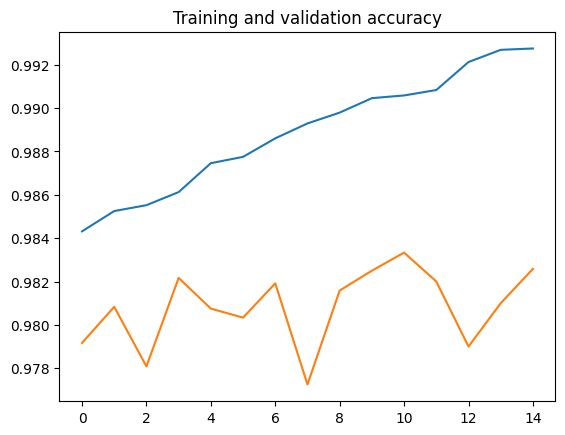

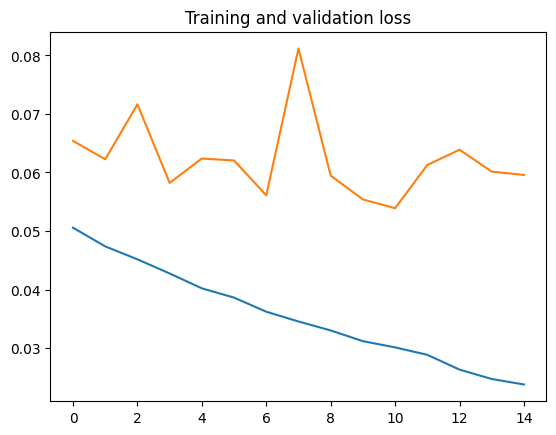

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Retrieve a list of accuracy results on training and validation data
# sets for each training epoch
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Retrieve a list of list results on training and validation data
# sets for each training epoch
loss = history.history['loss']
val_loss = history.history['val_loss']

# Get number of epochs
epochs = range(len(acc))

# Plot training and validation accuracy per epoch
plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.title('Training and validation accuracy')

plt.figure()

# Plot training and validation loss per epoch
plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title('Training and validation loss')

# **Model Testing**


In [ ]:
# import libraries
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt

# Predict probabilities for the test set using the trained model
y_pred_prob = model.predict(x_test, verbose=0)
y_pred = np.where(y_pred_prob > 0.5,1,0)

# Calculate and print the test accuracy using predicted and true labels
test_accuracy = accuracy_score(y_pred, y_test)
print("\nTest accuracy: {}".format(test_accuracy))


Test accuracy: 0.9834


In [ ]:
# Define a mask for selecting a range of indices (30 to 59)
mask = range(30, 60)

# Select the first 20 samples from the test set for visualization
X_valid = x_test[30:50]
actual_labels = y_test[30:50]

# Predict probabilities for the selected validation samples
y_pred_probs_valid = model.predict(X_valid)
y_pred_valid = np.where(y_pred_probs_valid > 0.5, 1, 0)


1/1 [==============================] - 0s 26ms/step


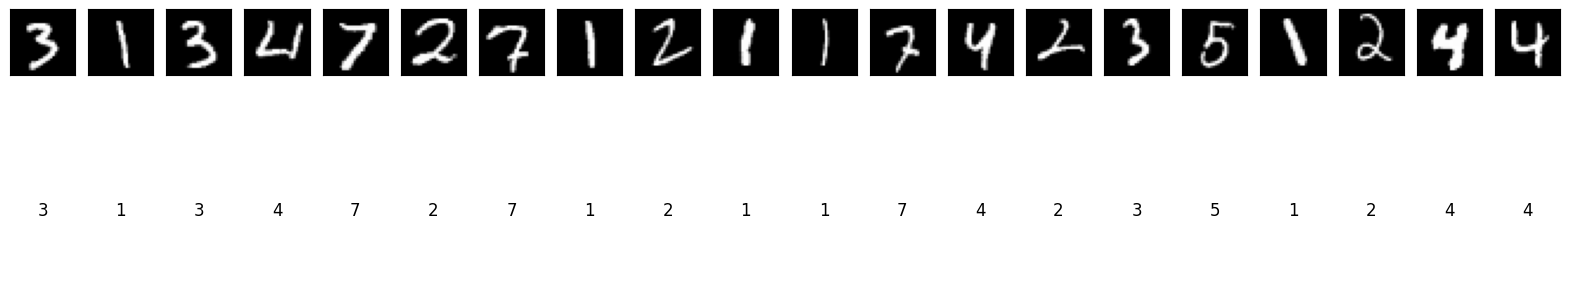

In [ ]:
n = len(X_valid)
plt.figure(figsize=(20, 4))

for i in range(n):
    # Display the original image
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(X_valid[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display the predicted digit
    predicted_digit = np.argmax(y_pred_probs_valid[i])
    ax = plt.subplot(2, n, i + 1 + n)
    plt.text(0.5, 0.5, str(predicted_digit), fontsize=12, ha='center', va='center')
    plt.axis('off')

# Show the plotted images
plt.show()

# Close the plot
plt.close()


This Convolutional Neural Network (CNN) model achieves an impressive
98% accuracy on the MNIST dataset, showcasing its ability to recognize
handwritten digits from 0 to 9. Utilizing its architecture, which mimics how the human brain processes visual information, the model learns various features such as edges and shapes from a large dataset of labeled images. This high accuracy demonstrates the model's robustness in generalizing to new, unseen handwriting samples, making it suitable for practical applications such as automatic reading of handwritten documents and optical character recognition (OCR) systems.